In [1]:
import pandas as pd
import openpyxl as op
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df_grades = pd.read_excel('D:/Project_test/1636957475256443.xlsx')
df_persons_2017 = pd.read_excel('D:/Project_test/выборка студентов с 2017.xls', sheet_name = 'Персоны', skiprows=[0, 1])
df_students_2017 = pd.read_excel('D:/Project_test/выборка студентов с 2017.xls', sheet_name = 'Обучающиеся', skiprows=[0, 1, 2, 3, 4, 5, 6])

# Подготовка данных

In [3]:
df_grades.head(5)

,student_number,student_status,student_compensation_type,student_program,staff_fio,subject,date,form_control,mark
0,21071352,1,1,09.03.01 Информатика и вычислительная техника ...,NaN,Иностранный язык,NaN,Зачет,NaN
1,21051359,1,1,"17.05.02 Стрелково-пушечное, артиллерийское и ...",NaN,Иностранный язык,NaN,Зачет,NaN
2,20091445,1,1,08.03.01 Строительство Промышленное и гражданс...,NaN,Иностранный язык,NaN,Экзамен,NaN
3,21051354,1,1,"17.05.02 Стрелково-пушечное, артиллерийское и ...",NaN,Иностранный язык,NaN,Зачет,NaN
4,21071017,1,2,09.03.01 Информатика и вычислительная техника ...,NaN,Иностранный язык,NaN,Зачет,NaN


In [4]:
df_persons_2017.head(5)

,№,Пол,Дата рождения,Льготы,Иностранный язык,Полученное образование (осн. док.),Законченное образ. учреждение (осн. док.),Документ о полученном образовании (осн. док.),Ср. балл док-та об образовании (осн. док.),Иностранное гражданство,Город
0,1,Ж,13.06.2002,NaN,Английский,"Среднее общее образование, 2020 г.","МБОУ ""СОШ №100"" Россия, г. Ижевск (18), Респ. ...",Аттестат о среднем общем образовании 018240050...,4.067,NaN,п. Ува (р-н Увинский Респ. Удмуртская)
1,2,М,13.05.1998,NaN,Английский,"Среднее общее образование, 2016 г.","МБОУ ""Италмасовская СОШ"" Россия, с. Италмас (1...",Аттестат о среднем общем образовании 018240013...,4.188,NaN,с. Италмас (р-н Завьяловский Респ. Удмуртская)
2,3,М,07.03.1986,NaN,Английский,"Среднее профессиональное образование, 2006 г.",Государственное образовательное учреждение сре...,Диплом о начальном профессиональном образовани...,3.851,NaN,г. Чернушка (р-н Чернушинский край Пермский)
3,4,Ж,21.08.1989,NaN,Английский,"Среднее профессиональное образование, 2008 г.","Ижевский индустриальный техникум Россия, г. Иж...",Диплом о среднем профессиональном образовании ...,3.600,NaN,г. Ижевск (Респ. Удмуртская)
4,5,М,25.04.2000,NaN,NaN,"Среднее общее образование, 2018 г.","Средняя общеобразовательная школа Египет, г. Каир",Аттестат о среднем общем образовании 0000 02.0...,0.000,Египет,г. Ижевск (Респ. Удмуртская)


In [5]:
pd.set_option('display.max_columns', None)
df_students_2017.head(5)

,№,Пол,Дата рождения,Полученное образование (док. студ.),Законченное образ. учреждение (док. студ.),Документ о полученном образовании (док. студ.),Ср. балл док-та об образовании (док. студ.),Личный номер,Зачетная книжка,Состояние,Курс,Группа,Формирующее подр.,Перечень,Направление подготовки (специальность),Направленность,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Нормативный срок,Целевик,Организация ЦП,Год приема
0,1,Ж,13.06.2002,"Среднее общее образование, 2020 г.","МБОУ ""СОШ №100"" Россия, г. Ижевск (18), Респ. ...",Аттестат о среднем общем образовании 018240050...,4.067,200695,20071489,активный,2,Б20-791-1,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.02 Информационные системы и технологии,NaN,Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2020
1,2,М,13.05.1998,"Среднее общее образование, 2016 г.","МБОУ ""Италмасовская СОШ"" Россия, с. Италмас (1...",Аттестат о среднем общем образовании 018240013...,4.188,203013,20092127,активный,2,Б20-191-1з,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.04 Программная инженерия,Разработка программно-информационных систем,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2020
2,3,М,07.03.1986,"Среднее профессиональное образование, 2006 г.",Государственное образовательное учреждение сре...,Диплом о начальном профессиональном образовани...,3.851,193580,19042199,активный,3,Б19-831-1зу,Приборостроительный (Факультет),ВО бакалавриат (2013),13.03.02 Электроэнергетика и электротехника,"Электрооборудование, электрохозяйство предприя...",Бакалавр,по договору,Заочная,Ускоренная программа,3 года 6 месяцев,Нет,NaN,2019
3,4,Ж,21.08.1989,"Среднее профессиональное образование, 2008 г.","Ижевский индустриальный техникум Россия, г. Иж...",Диплом о среднем профессиональном образовании ...,3.600,172802,17062039,отчислен,3,Б17-721-1з,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.05 Конструкторско-технологическое обеспе...,Технология машиностроения,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2017
4,5,М,25.04.2000,"Среднее общее образование, 2018 г.","Средняя общеобразовательная школа Египет, г. Каир",Аттестат о среднем общем образовании 0000 02.0...,0.000,212298,21561314,активный,1,Б21-310-10,Институт международных образовательных програм...,ВО бакалавриат (2013),15.03.06 Мехатроника и робототехника,Мехатронные системы в машино- и приборостроении,Бакалавр,по договору,Очная,Полный срок,4 года,Нет,NaN,2021


In [6]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464136 entries, 0 to 464135
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   student_number             463803 non-null  object
 1   student_status             464136 non-null  int64 
 2   student_compensation_type  464136 non-null  int64 
 3   student_program            464136 non-null  object
 4   staff_fio                  231109 non-null  object
 5   subject                    464136 non-null  object
 6   date                       295719 non-null  object
 7   form_control               464136 non-null  object
 8   mark                       297302 non-null  object
dtypes: int64(2), object(7)
memory usage: 31.9+ MB


In [7]:
df_persons_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11675 entries, 0 to 11674
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   №                                              11675 non-null  int64  
 1   Пол                                            11675 non-null  object 
 2   Дата рождения                                  11675 non-null  object 
 3   Льготы                                         160 non-null    object 
 4   Иностранный язык                               11369 non-null  object 
 5   Полученное образование (осн. док.)             11569 non-null  object 
 6   Законченное образ. учреждение (осн. док.)      11569 non-null  object 
 7   Документ о полученном образовании (осн. док.)  11569 non-null  object 
 8   Ср. балл док-та об образовании (осн. док.)     10379 non-null  float64
 9   Иностранное гражданство                        556

In [8]:
df_students_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11899 entries, 0 to 11898
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   №                                               11899 non-null  int64  
 1   Пол                                             11899 non-null  object 
 2   Дата рождения                                   11899 non-null  object 
 3   Полученное образование (док. студ.)             11710 non-null  object 
 4   Законченное образ. учреждение (док. студ.)      11710 non-null  object 
 5   Документ о полученном образовании (док. студ.)  11710 non-null  object 
 6   Ср. балл док-та об образовании (док. студ.)     10699 non-null  float64
 7   Личный номер                                    11899 non-null  int64  
 8   Зачетная книжка                                 11698 non-null  object 
 9   Состояние                              

In [9]:
# Удалим все ненужные значение из датафрейма с оценками
df_grades = df_grades.drop(columns=["student_status", "student_compensation_type", "student_program", "staff_fio", "subject", "date"])
df_grades.head(5)

,student_number,form_control,mark
0,21071352,Зачет,NaN
1,21051359,Зачет,NaN
2,20091445,Экзамен,NaN
3,21051354,Зачет,NaN
4,21071017,Зачет,NaN


In [10]:
# Удалим все ненужные значение из датафрейма со студентами
df_persons_2017 = df_persons_2017.drop(columns=["№", "Пол", "Дата рождения", "Льготы", "Иностранный язык", "Законченное образ. учреждение (осн. док.)", "Полученное образование (осн. док.)"])
df_persons_2017.head(5)

,Документ о полученном образовании (осн. док.),Ср. балл док-та об образовании (осн. док.),Иностранное гражданство,Город
0,Аттестат о среднем общем образовании 018240050...,4.067,NaN,п. Ува (р-н Увинский Респ. Удмуртская)
1,Аттестат о среднем общем образовании 018240013...,4.188,NaN,с. Италмас (р-н Завьяловский Респ. Удмуртская)
2,Диплом о начальном профессиональном образовани...,3.851,NaN,г. Чернушка (р-н Чернушинский край Пермский)
3,Диплом о среднем профессиональном образовании ...,3.600,NaN,г. Ижевск (Респ. Удмуртская)
4,Аттестат о среднем общем образовании 0000 02.0...,0.000,Египет,г. Ижевск (Респ. Удмуртская)


In [11]:
df_students_2017 = df_students_2017.drop(columns=["№", "Дата рождения", "Полученное образование (док. студ.)", "Законченное образ. учреждение (док. студ.)"])
df_students_2017.head(5)

,Пол,Документ о полученном образовании (док. студ.),Ср. балл док-та об образовании (док. студ.),Личный номер,Зачетная книжка,Состояние,Курс,Группа,Формирующее подр.,Перечень,Направление подготовки (специальность),Направленность,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Нормативный срок,Целевик,Организация ЦП,Год приема
0,Ж,Аттестат о среднем общем образовании 018240050...,4.067,200695,20071489,активный,2,Б20-791-1,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.02 Информационные системы и технологии,NaN,Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2020
1,М,Аттестат о среднем общем образовании 018240013...,4.188,203013,20092127,активный,2,Б20-191-1з,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.04 Программная инженерия,Разработка программно-информационных систем,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2020
2,М,Диплом о начальном профессиональном образовани...,3.851,193580,19042199,активный,3,Б19-831-1зу,Приборостроительный (Факультет),ВО бакалавриат (2013),13.03.02 Электроэнергетика и электротехника,"Электрооборудование, электрохозяйство предприя...",Бакалавр,по договору,Заочная,Ускоренная программа,3 года 6 месяцев,Нет,NaN,2019
3,Ж,Диплом о среднем профессиональном образовании ...,3.600,172802,17062039,отчислен,3,Б17-721-1з,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.05 Конструкторско-технологическое обеспе...,Технология машиностроения,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2017
4,М,Аттестат о среднем общем образовании 0000 02.0...,0.000,212298,21561314,активный,1,Б21-310-10,Институт международных образовательных програм...,ВО бакалавриат (2013),15.03.06 Мехатроника и робототехника,Мехатронные системы в машино- и приборостроении,Бакалавр,по договору,Очная,Полный срок,4 года,Нет,NaN,2021


In [12]:
df_test = pd.merge(
    df_persons_2017, df_students_2017,
    left_on='Документ о полученном образовании (осн. док.)',
    right_on='Документ о полученном образовании (док. студ.)',
    how='inner')



In [13]:
df_test.tail(50)

,Документ о полученном образовании (осн. док.),Ср. балл док-та об образовании (осн. док.),Иностранное гражданство,Город,Пол,Документ о полученном образовании (док. студ.),Ср. балл док-та об образовании (док. студ.),Личный номер,Зачетная книжка,Состояние,Курс,Группа,Формирующее подр.,Перечень,Направление подготовки (специальность),Направленность,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Нормативный срок,Целевик,Организация ЦП,Год приема
31403,Аттестат о среднем общем образовании 018240056...,4.688,NaN,с. Ува-Тукля (р-н Увинский Респ. Удмуртская),М,Аттестат о среднем общем образовании 018240056...,4.688,200993,20041492,активный,2,Б20-831-1,Приборостроительный (Факультет),ВО бакалавриат (2013),13.03.02 Электроэнергетика и электротехника,"Электрооборудование, электрохозяйство предприя...",Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2020
31404,Аттестат о среднем общем образовании 018240050...,4.118,NaN,с. Сюмси (р-н Сюмсинский Респ. Удмуртская),М,Аттестат о среднем общем образовании 018240050...,4.118,190496,19071386,активный,3,Б19-782-1,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.01 Информатика и вычислительная техника,Автоматизированные системы обработки информаци...,Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2019
31405,Аттестат о среднем общем образовании 018240037...,4.625,NaN,г. Ижевск (Респ. Удмуртская),М,Аттестат о среднем общем образовании 018240037...,4.625,190887,19061384,активный,3,Б19-311-1,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.06 Мехатроника и робототехника,Мехатронные системы в машино- и приборостроении,Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2019
31406,Аттестат о среднем общем образовании 018240041...,4.412,NaN,г. Ижевск (Респ. Удмуртская),Ж,Аттестат о среднем общем образовании 018240041...,4.412,180418,18051461,активный,4,Б18-011-1,Машиностроительный (Факультет),ВО бакалавриат (2013),27.03.03 Системный анализ и управление,Менеджмент организационно-технических систем,Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2018
31407,Диплом о среднем профессиональном образовании ...,4.788,NaN,с. Маядык (р-н Дюртюлинский Респ. Башкортостан),М,Диплом о среднем профессиональном образовании ...,4.788,193280,19062012,активный,3,Б19-721-1зу,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.05 Конструкторско-технологическое обеспе...,Технология машиностроения,Бакалавр,по договору,Заочная,Ускоренная программа,3 года 6 месяцев,Нет,NaN,2019
31408,Диплом о среднем профессиональном образовании ...,4.339,NaN,г. Ижевск (Респ. Удмуртская),М,Диплом о среднем профессиональном образовании ...,4.339,200454,20061390,активный,2,Б20-311-1,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.06 Мехатроника и робототехника,Мехатронные системы в машино- и приборостроении,Бакалавр,бюджет,Очная,Полный срок,4 года,Да,"АО ""Ижевский электромеханический завод ""Купол""",2020
31409,Аттестат о среднем общем образовании 002270000...,4.533,NaN,д. Мамяково (р-н Кушнаренковский Респ. Башкорт...,Ж,Аттестат о среднем общем образовании 002270000...,4.533,190172,19061310,активный,3,Б19-721-4,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.05 Конструкторско-технологическое обеспе...,Технология машиностроения,Бакалавр,бюджет,Очная,Полный срок,5 лет,Нет,NaN,2019
31410,Диплом о среднем профессиональном образовании ...,4.387,NaN,с. Куяново (р-н Краснокамский Респ. Башкортостан),Ж,Диплом о среднем профессиональном образовании ...,4.387,213020,21052032,активный,1,Б21-661-1зу,Машиностроительный (Факультет),ВО бакалавриат (2013),15.03.02 Технологические машины и оборудование,Машины и оборудование нефтяных и газовых промы...,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2021
31411,Диплом о среднем профессиональном образовании ...,4.550,NaN,д. Киреметево (р-н Краснокамский Респ. Башкорт...,М,Диплом о среднем профессиональном образовании ...,4.550,2

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31453 entries, 0 to 31452
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Документ о полученном образовании (осн. док.)   11419 non-null  object 
 1   Ср. балл док-та об образовании (осн. док.)      10131 non-null  float64
 2   Иностранное гражданство                         1869 non-null   object 
 3   Город                                           26892 non-null  object 
 4   Пол                                             31453 non-null  object 
 5   Документ о полученном образовании (док. студ.)  11419 non-null  object 
 6   Ср. балл док-та об образовании (док. студ.)     10134 non-null  float64
 7   Личный номер                                    31453 non-null  int64  
 8   Зачетная книжка                                 29638 non-null  object 
 9   Состояние                              

In [15]:
df_test.isnull().sum()

Документ о полученном образовании (осн. док.)     20034
Ср. балл док-та об образовании (осн. док.)        21322
Иностранное гражданство                           29584
Город                                              4561
Пол                                                   0
Документ о полученном образовании (док. студ.)    20034
Ср. балл док-та об образовании (док. студ.)       21319
Личный номер                                          0
Зачетная книжка                                    1815
Состояние                                             0
Курс                                                  0
Группа                                                6
Формирующее подр.                                     0
Перечень                                              0
Направление подготовки (специальность)                0
Направленность                                     1303
Присваиваемая квалификация                            0
Вид затрат                                      

In [16]:
df_test.dropna(subset=['Документ о полученном образовании (док. студ.)']).head(10)

,Документ о полученном образовании (осн. док.),Ср. балл док-та об образовании (осн. док.),Иностранное гражданство,Город,Пол,Документ о полученном образовании (док. студ.),Ср. балл док-та об образовании (док. студ.),Личный номер,Зачетная книжка,Состояние,Курс,Группа,Формирующее подр.,Перечень,Направление подготовки (специальность),Направленность,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Нормативный срок,Целевик,Организация ЦП,Год приема
0,Аттестат о среднем общем образовании 018240050...,4.067,NaN,п. Ува (р-н Увинский Респ. Удмуртская),Ж,Аттестат о среднем общем образовании 018240050...,4.067,200695,20071489,активный,2,Б20-791-1,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.02 Информационные системы и технологии,NaN,Бакалавр,бюджет,Очная,Полный срок,4 года,Нет,NaN,2020
1,Аттестат о среднем общем образовании 018240013...,4.188,NaN,с. Италмас (р-н Завьяловский Респ. Удмуртская),М,Аттестат о среднем общем образовании 018240013...,4.188,203013,20092127,активный,2,Б20-191-1з,Информатика и вычислительная техника (Институт),ВО бакалавриат (2013),09.03.04 Программная инженерия,Разработка программно-информационных систем,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2020
2,Диплом о начальном профессиональном образовани...,3.851,NaN,г. Чернушка (р-н Чернушинский край Пермский),М,Диплом о начальном профессиональном образовани...,3.851,193580,19042199,активный,3,Б19-831-1зу,Приборостроительный (Факультет),ВО бакалавриат (2013),13.03.02 Электроэнергетика и электротехника,"Электрооборудование, электрохозяйство предприя...",Бакалавр,по договору,Заочная,Ускоренная программа,3 года 6 месяцев,Нет,NaN,2019
3,Диплом о среднем профессиональном образовании ...,3.600,NaN,г. Ижевск (Респ. Удмуртская),Ж,Диплом о среднем профессиональном образовании ...,3.600,172802,17062039,отчислен,3,Б17-721-1з,"Современные технологии машиностроения, автомоб...",ВО бакалавриат (2013),15.03.05 Конструкторско-технологическое обеспе...,Технология машиностроения,Бакалавр,по договору,Заочная,Полный срок,4 года 6 месяцев,Нет,NaN,2017
4,Аттестат о среднем общем образовании 0000 02.0...,0.000,Египет,г. Ижевск (Респ. Удмуртская),М,Аттестат о среднем общем образовании 0000 02.0...,0.000,212298,21561314,активный,1,Б21-310-10,Институт международных образовательных програм...,ВО бакалавриат (2013),15.03.06 Мехатроника и робототехника,Мехатронные системы в машино- и приборостроении,Бакалавр,по договору,Очная,Полный срок,4 года,Нет,NaN,2021
5,Аттестат о среднем общем образовании 0000 02.0...,0.000,Египет,г. Ижевск (Респ. Удмуртская),М,Аттестат о среднем общем образовании 0000 02.0...,0.000,212303,21561325,активный,1,Б21-280-10,Институт международных образовательных програм...,ВО бакалавриат (2013),11.03.02 Инфокоммуникационные технологии и сис...,Сети связи и системы коммутации,Бакалавр,по договору,Очная,Полный срок,4 года,Нет,NaN,2021
6,Аттестат о среднем общем образовании 0000 02.0...,0.000,Египет,г. Ижевск (Респ. Удмуртская),Ж,Аттестат о среднем общем образовании 0000 02.0...,0.000,212307,21561330,активный,1,Б21-280-10,Институт международных образовательных програм...,ВО бакалавриат (2013),11.03.02 Инфокоммуникационные технологии и сис...,Сети связи и системы коммутации,Бакалавр,по договору,Очная,Полный срок,4 года,Нет,NaN,2021
7,Аттестат о среднем общем образовании 0000 02.0...,0.000,Египет,г. Ижевск (Респ. Удмуртская),Ж,Аттестат о среднем общем образовании 0000 02.0...,0.000,212308,21561331,активный,1,Б21-280-10,Институт международных образовательных програм...,ВО бакалавриат (2013),11.03.02 Инфокоммуникационные технологии и сис...,Сети связи и системы коммутации,Бакалавр,по договору,Очная,Полный срок,4 года,Нет,NaN,2021
8,Диплом о среднем профессиональном образовании ...,NaN,NaN,г. Ижевск (Респ. Удмуртская),Ж,Диплом о среднем профессиональном образовании ...,NaN,191934,19022080,активный,3,Б19-521-1зу,Цифровая экономика (Институт),ВО бакалавриат (2013),38.03.01 Экономика,Финансы и кредит,Бакалавр,по д

In [17]:
# Создание сводной таблицы с подсчетом оценок для каждого студента
pivot_df = df_grades.pivot_table(index=['student_number'], columns='mark', aggfunc='size', fill_value=0)

# Сброс индекса для получения плоской таблицы
pivot_df = pivot_df.reset_index()    


In [18]:
pivot_df.head(30)

mark,student_number,Выбыл,Зачтено,Не должен сдавать,Не допущен,Не зачтено,Не явился (неуваж.),Не явился (уваж.),Неудовлетворительно,Неявка по неизвестной причине,Отлично,Удовлетворительно,Хорошо
0,0415401,0,5,0,0,0,1,26,0,1,0,1,0
1,0505312,0,16,0,0,3,19,0,1,0,1,11,7
2,06091179,0,29,0,0,0,6,0,0,0,2,13,8
3,07062117,0,25,0,0,0,26,0,0,0,0,17,3
4,07071207,0,17,0,0,0,10,0,0,0,1,10,5
5,07081029,0,22,0,1,1,30,0,0,0,2,13,6
6,08051002,0,39,0,0,0,2,0,0,0,4,18,13
7,08061145,0,29,0,0,0,16,0,0,0,10,9,7
8,08062114,0,33,0,0,0,20,0,0,0,5,6,10
9,08092071,0,87,0,6,0,7,0,0,0,16,34,18


In [19]:
df_test['Зачетная книжка'] = df_test['Зачетная книжка'].astype("category") 

In [20]:
df_merged = pd.merge(
    df_test, pivot_df,
    left_on='Зачетная книжка',
    right_on='student_number',
    how='inner')

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16679 entries, 0 to 16678
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Документ о полученном образовании (осн. док.)   6079 non-null   object 
 1   Ср. балл док-та об образовании (осн. док.)      5681 non-null   float64
 2   Иностранное гражданство                         716 non-null    object 
 3   Город                                           14270 non-null  object 
 4   Пол                                             16679 non-null  object 
 5   Документ о полученном образовании (док. студ.)  6079 non-null   object 
 6   Ср. балл док-та об образовании (док. студ.)     5682 non-null   float64
 7   Личный номер                                    16679 non-null  int64  
 8   Зачетная книжка                                 16679 non-null  object 
 9   Состояние                              

In [22]:
df_merged.isnull().sum()

Документ о полученном образовании (осн. док.)     10600
Ср. балл док-та об образовании (осн. док.)        10998
Иностранное гражданство                           15963
Город                                              2409
Пол                                                   0
Документ о полученном образовании (док. студ.)    10600
Ср. балл док-та об образовании (док. студ.)       10997
Личный номер                                          0
Зачетная книжка                                       0
Состояние                                             0
Курс                                                  0
Группа                                                0
Формирующее подр.                                     0
Перечень                                              0
Направление подготовки (специальность)                0
Направленность                                      630
Присваиваемая квалификация                            0
Вид затрат                                      

In [23]:
df_merged = df_merged.dropna(subset=['Документ о полученном образовании (осн. док.)', 'Документ о полученном образовании (док. студ.)'])


In [24]:
df_merged = df_merged.drop(columns=['Документ о полученном образовании (осн. док.)',
                                    'Ср. балл док-та об образовании (осн. док.)',
                                    'Личный номер',
                                    'Зачетная книжка',
                                    'Группа',
                                    'Направленность',
                                    'Нормативный срок',
                                    'Организация ЦП',
                                    'Год приема',
                                    'student_number',
                                    'Курс',
                                    'Документ о полученном образовании (док. студ.)',
                                    'student_number',
                                    'Перечень',
                                    'Направление подготовки (специальность)'])

In [25]:
df_merged = df_merged.rename(columns={"Иностранное гражданство": "Гражданство"})
df_merged = df_merged.fillna({'Гражданство':'Россия'})
df_merged.head(5)

,Гражданство,Город,Пол,Ср. балл док-та об образовании (док. студ.),Состояние,Формирующее подр.,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Целевик,Выбыл,Зачтено,Не должен сдавать,Не допущен,Не зачтено,Не явился (неуваж.),Не явился (уваж.),Неудовлетворительно,Неявка по неизвестной причине,Отлично,Удовлетворительно,Хорошо
0,Россия,п. Ува (р-н Увинский Респ. Удмуртская),Ж,4.067,активный,Информатика и вычислительная техника (Институт),Бакалавр,бюджет,Очная,Полный срок,Нет,0,8,0,0,0,0,0,0,0,7,0,3
1,Россия,с. Италмас (р-н Завьяловский Респ. Удмуртская),М,4.188,активный,Информатика и вычислительная техника (Институт),Бакалавр,по договору,Заочная,Полный срок,Нет,0,2,0,0,0,4,0,0,0,0,3,0
2,Россия,г. Ижевск (Респ. Удмуртская),Ж,3.600,отчислен,"Современные технологии машиностроения, автомоб...",Бакалавр,по договору,Заочная,Полный срок,Нет,0,9,0,0,0,4,0,0,0,2,2,2
3,Россия,г. Ижевск (Респ. Удмуртская),Ж,NaN,активный,Цифровая экономика (Институт),Бакалавр,по договору,Заочная,Ускоренная программа,Нет,0,9,0,0,1,2,0,1,0,5,5,9
4,Россия,д. Сепож (р-н Игринский Респ. Удмуртская),Ж,4.000,активный,Машиностроительный (Факультет),Магистр,бюджет,Очная,Полный срок,Нет,0,10,0,0,0,0,0,0,0,5,0,4


In [26]:
df_merged = df_merged.fillna({'Город':'г. Ижевск (Респ. Удмуртская)'})
df_merged.head(5)

,Гражданство,Город,Пол,Ср. балл док-та об образовании (док. студ.),Состояние,Формирующее подр.,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Целевик,Выбыл,Зачтено,Не должен сдавать,Не допущен,Не зачтено,Не явился (неуваж.),Не явился (уваж.),Неудовлетворительно,Неявка по неизвестной причине,Отлично,Удовлетворительно,Хорошо
0,Россия,п. Ува (р-н Увинский Респ. Удмуртская),Ж,4.067,активный,Информатика и вычислительная техника (Институт),Бакалавр,бюджет,Очная,Полный срок,Нет,0,8,0,0,0,0,0,0,0,7,0,3
1,Россия,с. Италмас (р-н Завьяловский Респ. Удмуртская),М,4.188,активный,Информатика и вычислительная техника (Институт),Бакалавр,по договору,Заочная,Полный срок,Нет,0,2,0,0,0,4,0,0,0,0,3,0
2,Россия,г. Ижевск (Респ. Удмуртская),Ж,3.600,отчислен,"Современные технологии машиностроения, автомоб...",Бакалавр,по договору,Заочная,Полный срок,Нет,0,9,0,0,0,4,0,0,0,2,2,2
3,Россия,г. Ижевск (Респ. Удмуртская),Ж,NaN,активный,Цифровая экономика (Институт),Бакалавр,по договору,Заочная,Ускоренная программа,Нет,0,9,0,0,1,2,0,1,0,5,5,9
4,Россия,д. Сепож (р-н Игринский Респ. Удмуртская),Ж,4.000,активный,Машиностроительный (Факультет),Магистр,бюджет,Очная,Полный срок,Нет,0,10,0,0,0,0,0,0,0,5,0,4


In [27]:
df_merged['Ср. балл док-та об образовании (док. студ.)'] = df_merged['Ср. балл док-та об образовании (док. студ.)'].fillna(df_merged['Ср. балл док-та об образовании (док. студ.)'].mean())

In [28]:
df_merged['Состояние'].value_counts()

Состояние
активный             4897
отчислен              984
отп.акад.б.посещ      191
отп.по.ух.за.реб.       6
отп.по.бер.и.род        1
Name: count, dtype: int64

In [29]:
df_merged['Status'] = np.where(df_merged['Состояние'] != 'отчислен', 1, 0)
df_merged = df_merged.drop(columns=['Состояние'])

df_merged['Город_Категория'] = np.where(df_merged['Город'] == 'г. Ижевск (Респ. Удмуртская)', 1, 0)
df_merged = df_merged.drop(columns=['Город'])

df_merged['Гражданство_Категория'] = np.where(df_merged['Гражданство'] == 'Россия', 1, 0)
df_merged = df_merged.drop(columns=['Гражданство'])

if isinstance(df_merged, pd.DataFrame):
    print("df_merged is a DataFrame")
else:
    print("df_merged is not a DataFrame, converting...")
    df_merged = pd.DataFrame(df_merged)

df_merged is a DataFrame


In [30]:
print(df_merged.dtypes)

Пол                                             object
Ср. балл док-та об образовании (док. студ.)    float64
Формирующее подр.                               object
Присваиваемая квалификация                      object
Вид затрат                                      object
Форма освоения                                  object
Условие освоения                                object
Целевик                                         object
Выбыл                                            int64
Зачтено                                          int64
Не должен сдавать                                int64
Не допущен                                       int64
Не зачтено                                       int64
Не явился (неуваж.)                              int64
Не явился (уваж.)                                int64
Неудовлетворительно                              int64
Неявка по неизвестной причине                    int64
Отлично                                          int64
Удовлетвор

In [31]:
df_merged['Status'] = pd.Series(df_merged['Status'])
df_merged['Город_Категория'] = pd.Series(df_merged['Город_Категория'])
df_merged['Гражданство_Категория'] = pd.Series(df_merged['Гражданство_Категория'])

In [32]:
print(df_merged.dtypes)

Пол                                             object
Ср. балл док-та об образовании (док. студ.)    float64
Формирующее подр.                               object
Присваиваемая квалификация                      object
Вид затрат                                      object
Форма освоения                                  object
Условие освоения                                object
Целевик                                         object
Выбыл                                            int64
Зачтено                                          int64
Не должен сдавать                                int64
Не допущен                                       int64
Не зачтено                                       int64
Не явился (неуваж.)                              int64
Не явился (уваж.)                                int64
Неудовлетворительно                              int64
Неявка по неизвестной причине                    int64
Отлично                                          int64
Удовлетвор

In [33]:
df_merged['Status'].value_counts()

Status
1    5095
0     984
Name: count, dtype: int64

In [34]:
mean_value = df_merged['Ср. балл док-та об образовании (док. студ.)'].replace(0, pd.NA).mean()
df_merged['Ср. балл док-та об образовании (док. студ.)'] = df_merged['Ср. балл док-та об образовании (док. студ.)'].replace(0, mean_value)

In [35]:
df = df_merged

In [36]:
df.head()

,Пол,Ср. балл док-та об образовании (док. студ.),Формирующее подр.,Присваиваемая квалификация,Вид затрат,Форма освоения,Условие освоения,Целевик,Выбыл,Зачтено,Не должен сдавать,Не допущен,Не зачтено,Не явился (неуваж.),Не явился (уваж.),Неудовлетворительно,Неявка по неизвестной причине,Отлично,Удовлетворительно,Хорошо,Status,Город_Категория,Гражданство_Категория
0,Ж,4.067000,Информатика и вычислительная техника (Институт),Бакалавр,бюджет,Очная,Полный срок,Нет,0,8,0,0,0,0,0,0,0,7,0,3,1,0,1
1,М,4.188000,Информатика и вычислительная техника (Институт),Бакалавр,по договору,Заочная,Полный срок,Нет,0,2,0,0,0,4,0,0,0,0,3,0,1,0,1
2,Ж,3.600000,"Современные технологии машиностроения, автомоб...",Бакалавр,по договору,Заочная,Полный срок,Нет,0,9,0,0,0,4,0,0,0,2,2,2,0,1,1
3,Ж,3.986895,Цифровая экономика (Институт),Бакалавр,по договору,Заочная,Ускоренная программа,Нет,0,9,0,0,1,2,0,1,0,5,5,9,1,1,1
4,Ж,4.000000,Машиностроительный (Факультет),Магистр,бюджет,Очная,Полный срок,Нет,0,10,0,0,0,0,0,0,0,5,0,4,1,0,1


# Анализ данных

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

Text(0.5, 1.0, 'Распределение среднего балла по Ижгту')

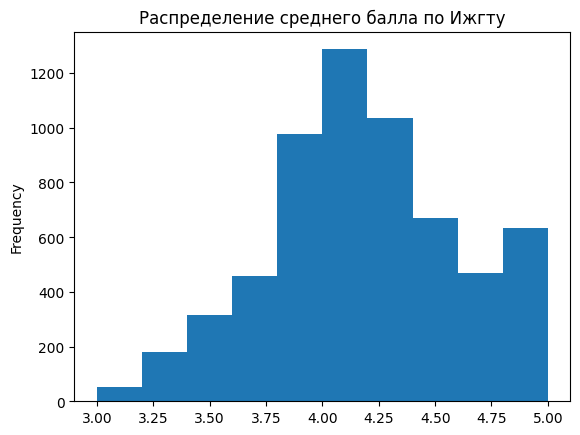

In [38]:
df['Ср. балл док-та об образовании (док. студ.)'].plot(kind='hist')
plt.title('Распределение среднего балла по Ижгту')

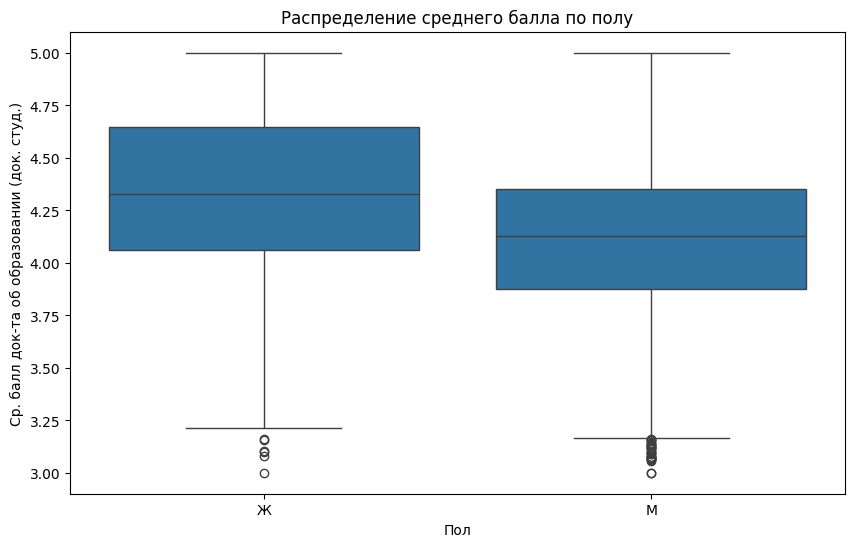

In [39]:
# Распределение среднего балла по полу
plt.figure(figsize=(10, 6))
sns.boxplot(x='Пол', y='Ср. балл док-та об образовании (док. студ.)', data=df)
plt.title('Распределение среднего балла по полу')
plt.show()

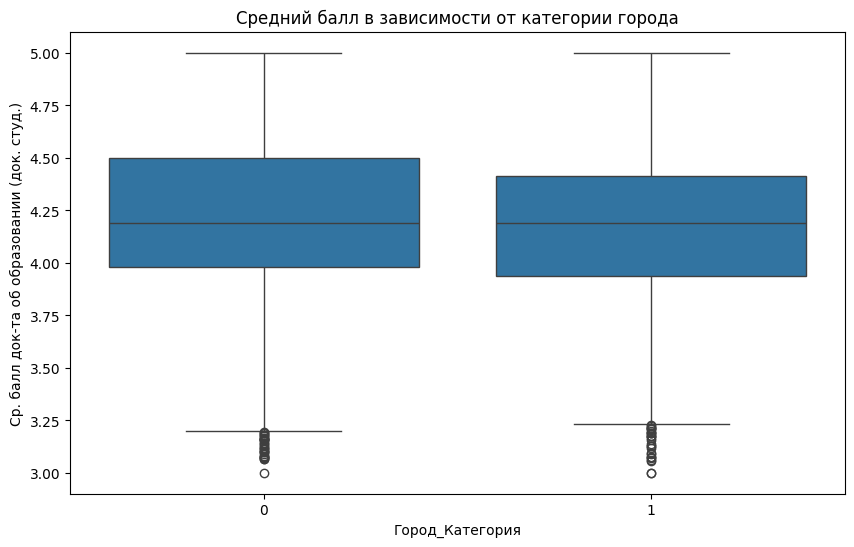

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Город_Категория', y='Ср. балл док-та об образовании (док. студ.)', data=df)
plt.title('Средний балл в зависимости от категории города')
plt.show()

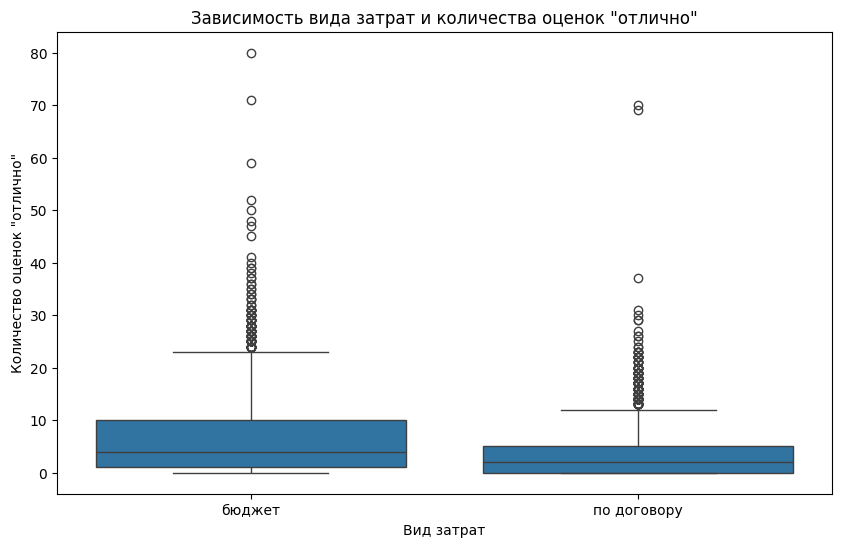

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Вид затрат', y='Отлично', data=df)
plt.title('Зависимость вида затрат и количества оценок "отлично"')
plt.xlabel('Вид затрат')
plt.ylabel('Количество оценок "отлично"')
plt.show()

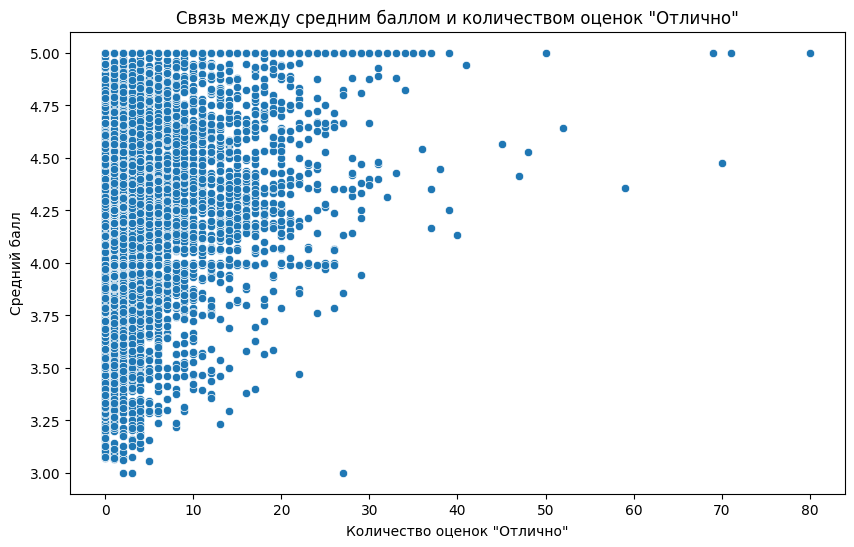

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Отлично', y='Ср. балл док-та об образовании (док. студ.)', data=df)
plt.title('Связь между средним баллом и количеством оценок "Отлично"')
plt.xlabel('Количество оценок "Отлично"')
plt.ylabel('Средний балл')
plt.show()

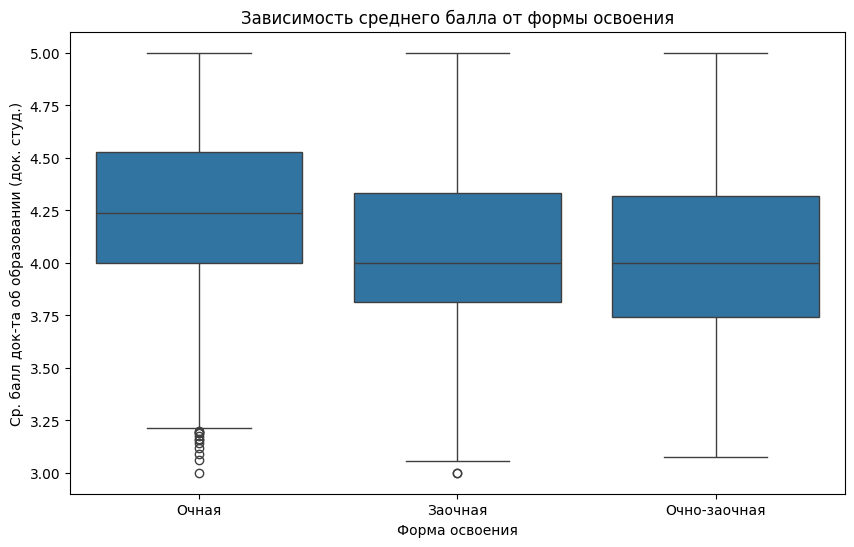

In [43]:
# Зависимость среднего балла от формы освоения
plt.figure(figsize=(10, 6))
sns.boxplot(x='Форма освоения', y='Ср. балл док-та об образовании (док. студ.)', data=df)
plt.title('Зависимость среднего балла от формы освоения')
plt.show()

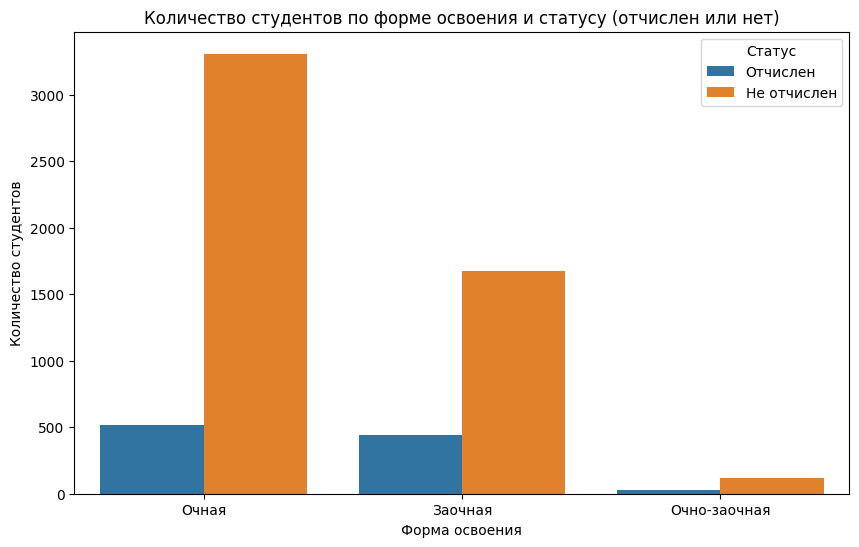

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Форма освоения', hue='Status', data=df)
plt.title('Количество студентов по форме освоения и статусу (отчислен или нет)')
plt.xlabel('Форма освоения')
plt.ylabel('Количество студентов')
plt.legend(title='Статус', labels=['Отчислен', 'Не отчислен'])
plt.show()


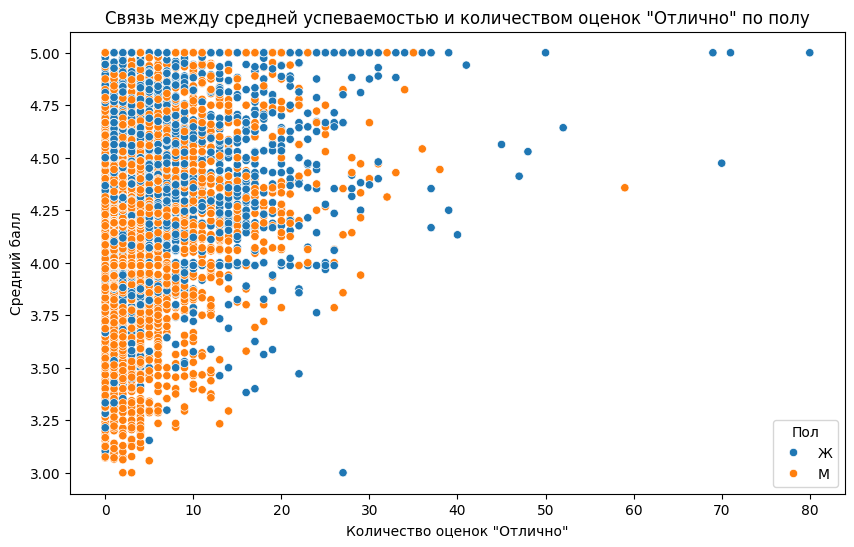

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Отлично', y='Ср. балл док-та об образовании (док. студ.)', hue='Пол', data=df)
plt.title('Связь между средней успеваемостью и количеством оценок "Отлично" по полу')
plt.xlabel('Количество оценок "Отлично"')
plt.ylabel('Средний балл')
plt.legend(title='Пол')
plt.show()

C:\Users\cheka\AppData\Local\Temp\ipykernel_7484\193917391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Пол', data=df, palette='Set2')


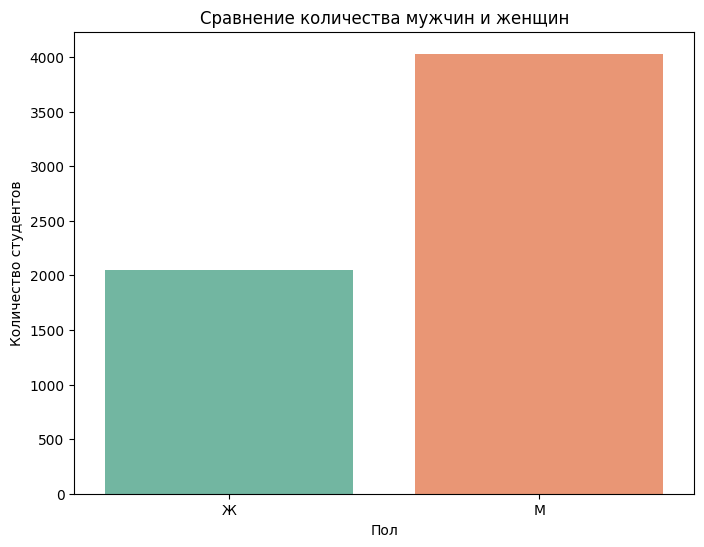

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Пол', data=df, palette='Set2')
plt.title('Сравнение количества мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')
plt.show()

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [48]:
X = df_merged.drop('Status', axis=1)
y = df_merged['Status']



# Определение категориальных и числовых столбцов
categorical_features = ['Пол', 'Формирующее подр.', 'Присваиваемая квалификация', 'Вид затрат', 'Форма освоения', 'Условие освоения', 'Целевик']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Создание ColumnTransformer для автоматического преобразования категориальных данных в числовые значения
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

In [49]:
df1 = pd.DataFrame(X_processed)
df1.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-2.903101e-01,-0.053468,-0.639867,-0.056321,-0.305835,-0.349814,-0.682798,-0.112411,-0.213084,-0.055664,0.268887,-0.782109,-0.545176,-0.979000,0.191941,0.0,4.0,0.0,0.0,1.0,0.0,1.0
1,-5.271105e-03,-0.053468,-1.131131,-0.056321,-0.305835,-0.349814,-0.202654,-0.112411,-0.213084,-0.055664,-0.807495,-0.193251,-1.059925,-0.979000,0.191941,1.0,4.0,0.0,1.0,0.0,0.0,1.0
2,-1.390419e+00,-0.053468,-0.557989,-0.056321,-0.305835,-0.349814,-0.202654,-0.112411,-0.213084,-0.055664,-0.499958,-0.389537,-0.716759,1.021451,0.191941,0.0,8.0,0.0,1.0,0.0,0.0,1.0
3,-4.790131e-01,-0.053468,-0.557989,-0.056321,-0.305835,1.062217,-0.442726,-0.112411,2.491176,-0.055664,-0.038651,0.199321,0.484322,1.021451,0.191941,0.0,9.0,0.0,1.0,0.0,1.0,1.0
4,-4.481416e-01,-0.053468,-0.476112,-0.056321,-0.305835,-0.349814,-0.682798,-0.112411,-0.213084,-0.055664,-0.038651,-0.782109,-0.373593,-0.979000,0.191941,0.0,6.0,2.0,0.0,1.0,0.0,1.0
5,-1.183118e+00,-0.053468,1.570823,-0.056321,-0.305835,1.062217,-0.322690,-0.112411,-0.213084,-0.055664,-0.346189,2.162181,0.999071,-0.979000,0.191941,1.0,8.0,0.0,0.0,1.0,0.0,0.0
6,1.622514e+00,-0.053468,2.307719,-0.056321,-0.305835,-0.349814,-0.682798,-0.112411,-0.213084,-0.055664,0.422656,0.984465,2.371734,-0.979000,0.191941,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,-1.820281e-13,-0.053468,-0.230480,-0.056321,-0.305835,-0.349814,-0.682798,-0.112411,-0.213084,-0.055664,-0.499958,-0.782109,0.141156,-0.979000,0.191941,1.0,6.0,0.0,0.0,1.0,0.0,1.0
8,2.444325e-01,-0.053468,0.588294,-0.056321,-0.305835,-0.349814,-0.682798,-0.112411,-0.213084,-0.055664,0.115118,-0.389537,0.655905,-0.979000,0.191941,1.0,7.0,0.0,0.0,1.0,0.0,1.0
9,-1.536798e-01,-0.053468,-1.049253,-0.056321,-0.305835,-0.349814,-0.442726,-0.112411,-0.213084,-0.055664,-0.807495,-0.193251,-0.716759,1.021451,0.191941,1.0,4.0,0.0,1.0,0.0,0.0,1.0


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6079 entries, 0 to 16678
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Пол                                          6079 non-null   object 
 1   Ср. балл док-та об образовании (док. студ.)  6079 non-null   float64
 2   Формирующее подр.                            6079 non-null   object 
 3   Присваиваемая квалификация                   6079 non-null   object 
 4   Вид затрат                                   6079 non-null   object 
 5   Форма освоения                               6079 non-null   object 
 6   Условие освоения                             6079 non-null   object 
 7   Целевик                                      6079 non-null   object 
 8   Выбыл                                        6079 non-null   int64  
 9   Зачтено                                      6079 non-null   int64  
 10  Не д

In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_processed, y, test_size = 0.3, random_state=42)

In [52]:
for model in [
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    XGBClassifier
]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10, random_state = 42, shuffle=True)

    s = model_selection.cross_val_score(cls, X_processed, y, scoring='roc_auc', cv=kfold)
    print(f"{model.__name__:22} AUC: {s.mean():.3f} | STD: {s.std():.2f}")

LogisticRegression     AUC: 0.871 | STD: 0.01
DecisionTreeClassifier AUC: 0.723 | STD: 0.03
KNeighborsClassifier   AUC: 0.821 | STD: 0.02
GaussianNB             AUC: 0.828 | STD: 0.01
SVC                    AUC: 0.874 | STD: 0.02
RandomForestClassifier AUC: 0.901 | STD: 0.01
XGBClassifier          AUC: 0.896 | STD: 0.02


In [53]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import GridSearchCV

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'xgbclassifier__n_estimators': [50, 100],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

grid.fit(X_processed, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.872 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10, 'xgbclassifier__n_estimators': 50}
0.877 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10, 'xgbclassifier__n_estimators': 100}
0.884 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50, 'xgbclassifier__n_estimators': 50}
0.882 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50, 'xgbclassifier__n_estimators': 100}
0.846 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10, 'xgbclassifier__n_estimators': 50}
0.846 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10, 'xgbclassifier__n_estimators': 100}
0.870 +/- 0.01 {'kneigh

from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
params = {
    "max_features" : [0.1, 1, 2, 3, 4, 5, 6],
    "n_estimators" : [30, 100, 200, 300, 400],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 7, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 5, 10],
    "random_state" : [42]
}
cv = model_selection.GridSearchCV(
    rf, params, n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)


In [54]:
from sklearn import ensemble
rf2 = ensemble.RandomForestClassifier(
        max_depth = 10,
        min_samples_leaf = 1,
        n_estimators = 30,
        random_state = 42,
        criterion = 'gini',
        max_features = 6, 
        min_samples_split = 3
)




  

In [55]:
rf2.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=3,
                       n_estimators=30, random_state=42)

In [56]:
rf2.score(X_test, y_test)

0.8898026315789473

In [57]:
from sklearn.metrics import confusion_matrix
y_pred = rf2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 111,  155],
       [  46, 1512]], dtype=int64)

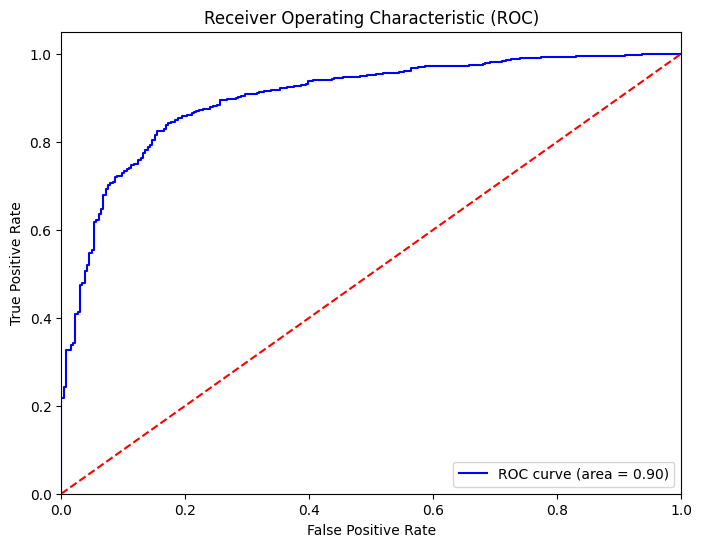

In [58]:
y_pred_proba = rf2.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [59]:
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.90


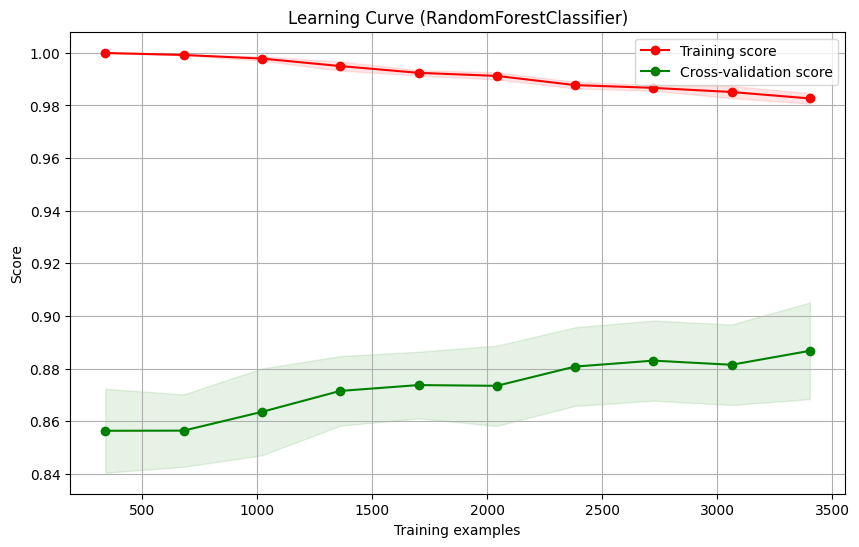

In [60]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf2, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve (RandomForestClassifier)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [61]:
importances = rf2.feature_importances_

In [62]:
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

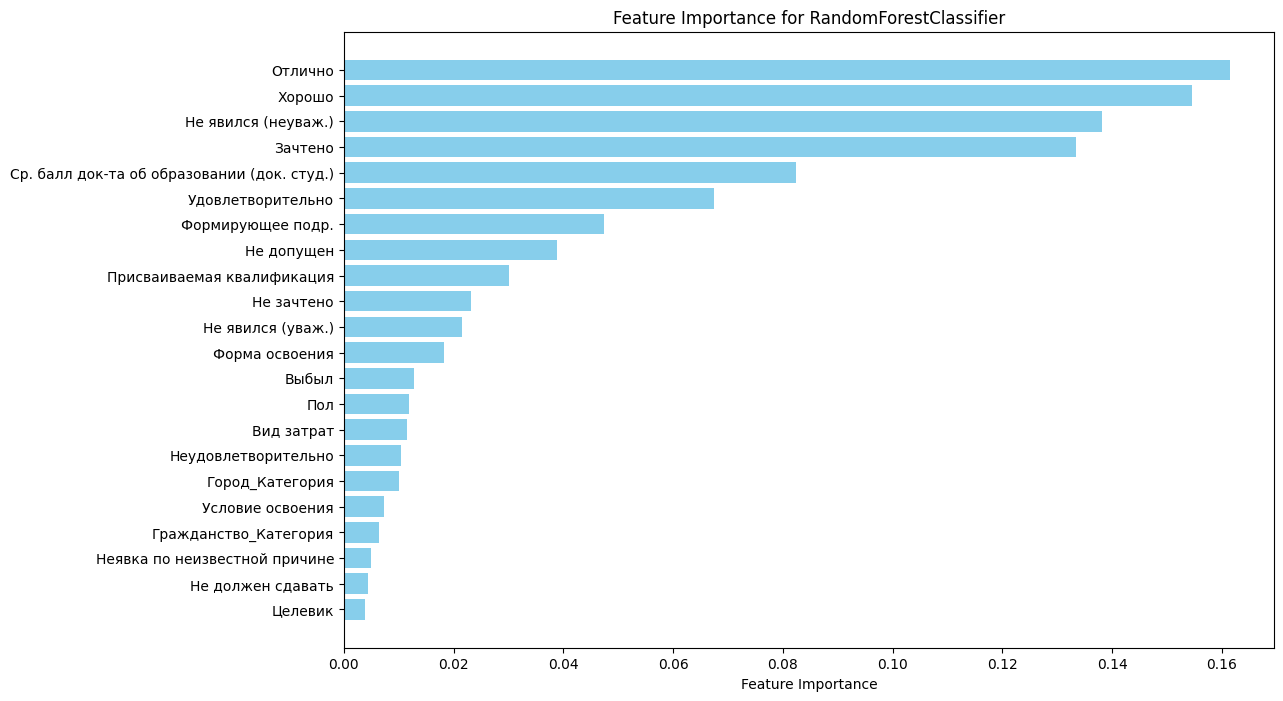

                                             Importance
Отлично                                        0.161417
Хорошо                                         0.154562
Не явился (неуваж.)                            0.138106
Зачтено                                        0.133456
Ср. балл док-та об образовании (док. студ.)    0.082312
Удовлетворительно                              0.067369
Формирующее подр.                              0.047330
Не допущен                                     0.038805
Присваиваемая квалификация                     0.030013
Не зачтено                                     0.023147
Не явился (уваж.)                              0.021508
Форма освоения                                 0.018317
Выбыл                                          0.012795
Пол                                            0.011952
Вид затрат                                     0.011544
Неудовлетворительно                            0.010350
Город_Категория                                0

In [63]:
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()

print(feature_importances)

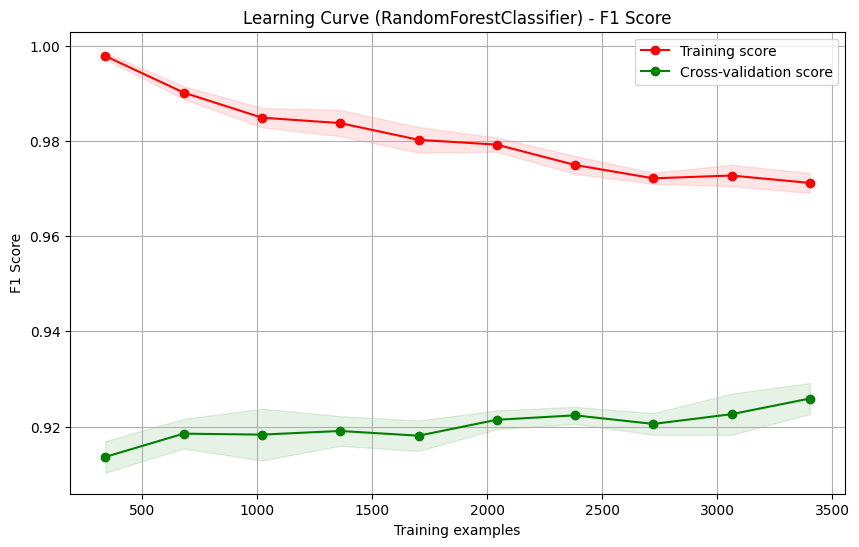

In [64]:
from sklearn.metrics import f1_score, make_scorer

train_sizes, train_scores, test_scores = learning_curve(
    rf2, X_train, y_train, cv=5, scoring=make_scorer(f1_score), n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve (RandomForestClassifier) - F1 Score')
plt.xlabel('Training examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [65]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf2, f)

print("Модель сохранена в 'random_forest_model.pkl'")

Модель сохранена в 'random_forest_model.pkl'
